In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()


Using TensorFlow backend.


In [2]:
data = pd.read_excel('data_v7.xlsx')

In [3]:
data.head()

,Unnamed: 0,locations_month,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,visibilityMiles,...,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,date,locations,label
0,0,barisal2015-1,26.0,17.0,21.0,8.70,6.0,53.0,10.0,6.0,...,1.5,24.0,13.0,23.0,23.0,10.17,3.0,2015-1,barisal,0
1,1,barisal2015-2,28.0,19.0,23.0,8.70,6.0,55.5,10.0,6.0,...,9.5,26.0,14.0,25.0,26.0,2.26,3.0,2015-2,barisal,0
2,2,barisal2015-3,33.0,22.0,27.0,11.60,7.0,50.5,10.0,6.0,...,13.0,30.0,16.0,29.0,30.0,4.83,14.0,2015-3,barisal,0
3,3,barisal2015-4,33.0,26.5,29.0,12.75,7.0,67.5,10.0,6.0,...,31.5,34.0,23.0,30.0,34.0,44.09,16.0,2015-4,barisal,0
4,4,barisal2015-5,35.0,28.0,31.0,13.10,8.0,69.5,10.0,6.0,...,37.5,38.0,25.0,32.0,38.0,20.35,15.0,2015-5,barisal,0


In [4]:
len(data[data.isnull().any(axis=1)])

0

In [5]:
date = data['date']

In [6]:
data.drop(['Unnamed: 0','locations_month','label','date'],axis=1,inplace=True)

In [7]:
data.drop(['pressureInches','visibilityMiles'],axis=1,inplace=True)

In [8]:
data.head()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,locations
0,26.0,17.0,21.0,8.70,6.0,53.0,10.0,1015.0,1.5,24.0,13.0,23.0,23.0,10.17,3.0,barisal
1,28.0,19.0,23.0,8.70,6.0,55.5,10.0,1013.5,9.5,26.0,14.0,25.0,26.0,2.26,3.0,barisal
2,33.0,22.0,27.0,11.60,7.0,50.5,10.0,1011.0,13.0,30.0,16.0,29.0,30.0,4.83,14.0,barisal
3,33.0,26.5,29.0,12.75,7.0,67.5,10.0,1008.0,31.5,34.0,23.0,30.0,34.0,44.09,16.0,barisal
4,35.0,28.0,31.0,13.10,8.0,69.5,10.0,1005.0,37.5,38.0,25.0,32.0,38.0,20.35,15.0,barisal


In [9]:
data.describe()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000
mean,31.898517,23.104411,27.110656,11.016276,6.699844,64.985363,9.748048,1007.884075,25.414130,31.416081,20.001171,27.958236,31.319087,103.650510,15.273060
std,3.241853,4.492209,3.855623,1.827158,0.719880,13.844562,0.653473,5.172147,20.478454,5.118565,5.638515,3.116602,5.249157,149.641049,11.933998
min,22.000000,9.000000,15.000000,7.500000,5.000000,18.500000,5.000000,997.000000,0.000000,18.000000,4.500000,17.000000,17.000000,0.000000,0.000000
25%,30.000000,19.500000,24.000000,8.700000,6.000000,54.500000,10.000000,1003.500000,6.125000,27.000000,15.000000,26.000000,27.000000,8.950000,4.000000
50%,32.500000,25.000000,28.000000,11.600000,7.000000,68.000000,10.000000,1008.000000,23.000000,33.000000,23.000000,29.000000,33.000000,52.115000,16.000000
75%,34.000000,27.000000,30.000000,12.800000,7.000000,76.000000,10.000000,1013.000000,40.500000,36.000000,25.000000,30.000000,36.000000,141.170000,25.000000
max,43.000000,32.000000,38.000000,13.800000,9.000000,89.500000,10.000000,1019.000000,82.500000,42.000000,27.000000,38.000000,42.000000,1732.600000,299.000000


In [10]:
data.shape

(2562, 16)

In [11]:
list(data.columns)

['maxtempC',
 'mintempC',
 'avgtempC',
 'sunHour',
 'uvIndex',
 'humidity',
 'visibility',
 'pressure',
 'cloudcover',
 'HeatIndexC',
 'DewPointC',
 'WindChillC',
 'FeelsLikeC',
 'rainFall',
 'rainDays',
 'locations']

In [12]:
loc_lst = list(data['locations'].unique())

i = 0
for haha in loc_lst:
    
    data.loc[data.locations == haha, 'locations'] = i
    i+=1

In [13]:
data.corr()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,locations
maxtempC,1.000000,0.797501,0.909098,0.774211,0.821890,0.205025,-0.056772,-0.674420,0.490268,0.808328,0.559769,0.910055,0.816631,0.268291,0.531454,0.053065
mintempC,0.797501,1.000000,0.954623,0.785732,0.795536,0.568866,-0.117267,-0.875864,0.745291,0.971363,0.855579,0.930556,0.972693,0.444601,0.724013,-0.098490
avgtempC,0.909098,0.954623,1.000000,0.778998,0.838613,0.402897,-0.078197,-0.811171,0.673871,0.929708,0.738929,0.954945,0.934225,0.424528,0.669351,-0.045289
sunHour,0.774211,0.785732,0.778998,1.000000,0.729958,0.411355,-0.043615,-0.736360,0.511181,0.793423,0.656132,0.791034,0.796918,0.176593,0.613974,-0.026310
uvIndex,0.821890,0.795536,0.838613,0.729958,1.000000,0.213123,0.106453,-0.609243,0.367579,0.780755,0.567798,0.853297,0.783358,0.159381,0.465248,-0.064029
humidity,0.205025,0.568866,0.402897,0.411355,0.213123,1.000000,-0.448141,-0.636538,0.740321,0.600097,0.886743,0.365065,0.593601,0.477358,0.634772,-0.104425
visibility,-0.056772,-0.117267,-0.078197,-0.043615,0.106453,-0.448141,1.000000,0.227295,-0.488405,-0.119414,-0.283850,-0.012071,-0.119131,-0.493262,-0.352479,-0.026394
pressure,-0.674420,-0.875864,-0.811171,-0.736360,-0.609243,-0.636538,0.227295,1.000000,-0.832867,-0.902136,-0.824570,-0.792339,-0.900993,-0.502659,-0.762050,-0.013927
cloudcover,0.490268,0.745291,0.673871,0.511181,0.367579,0.740321,-0.488405,-0.832867,1.000000,0.735995,0.781837,0.575432,0.734762,0.703806,0.785223,0.004089
HeatIndexC,0.808328,0.971363,0.929708,0.793423,0.780755,0.600097,-0.119414,-0.902136,0.735995,1.000000,0.883386,0.941055,0.998681,0.425756,0.718329,-0.070189


In [14]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)

In [15]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

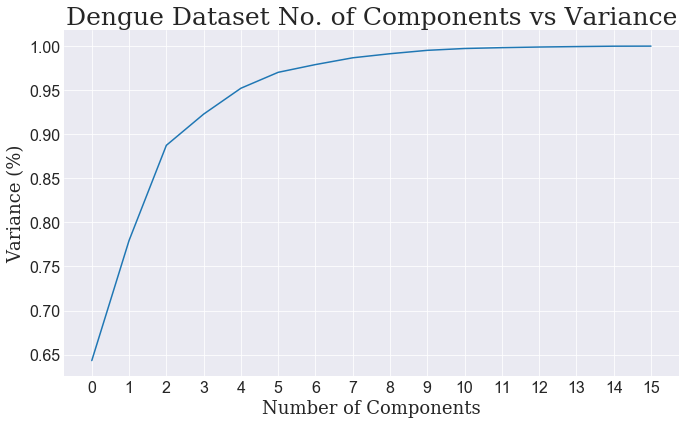

<Figure size 432x288 with 0 Axes>

In [141]:
pca = PCA().fit(data_rescaled)
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0,16,1))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 18}) 
plt.title('Dengue Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.tight_layout()
plt.show()

plt.savefig('pca.svg', format='svg',dpi=2000)



In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.64322704, 0.77949602, 0.88742781, 0.92284404, 0.95221987,
       0.97027512, 0.97906121, 0.98675608, 0.99137632, 0.99521803,
       0.9973061 , 0.99826377, 0.99897924, 0.99948174, 0.99991988,
       1.        ])

In [18]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data_rescaled)

In [19]:
labels = pd.read_excel('data_v7.xlsx',usecols=['label'])

In [20]:
data_pca.shape

(2562, 8)

In [21]:
labels_pca = np.array(labels)

In [22]:
labels_pca.shape

(2562, 1)

In [23]:
X,y = data_pca,labels_pca

In [24]:
X.shape

(2562, 8)

In [25]:
df = pd.DataFrame(data_pca,columns=['c1','c2','c3','c4','c5','c6','c7','c8'])

In [26]:
df['labels'] = y

In [27]:
df.groupby('labels').count().to_excel('count.xlsx','w')

In [28]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

c:\users\alvir\deelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
param_grid ={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

clf = GridSearchCV(estimator=lr , param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)

lr_pred = clf.predict(X_test)

bestlrf1 = f1_score(y_test,lr_pred)
bestlrpr = precision_score(y_test,lr_pred)
bestlrre = recall_score(y_test,lr_pred)
bestlrac = accuracy_score(y_test,lr_pred)


print('f1-score',f1_score(y_test,lr_pred))
print('precision-score',precision_score(y_test,lr_pred))
print('recall_score',recall_score(y_test,lr_pred))
print('accuracy_score',accuracy_score(y_test,lr_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


f1-score 0.7627765064836003
precision-score 0.8169934640522876
recall_score 0.7153075822603719
accuracy_score 0.780831571529246


In [31]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)


bestrfcf1 = f1_score(y_test,rfc_pred)
bestrfcpr = precision_score(y_test,rfc_pred)
bestrfcre = recall_score(y_test,rfc_pred)
bestrfcac = accuracy_score(y_test,rfc_pred)

print('f1-score',f1_score(y_test,rfc_pred))
print('precision-score',precision_score(y_test,rfc_pred))
print('recall_score',recall_score(y_test,rfc_pred))
print('accuracy_score',accuracy_score(y_test,rfc_pred))

f1-score 0.9928977272727273
precision-score 0.9858956276445698
recall_score 1.0
accuracy_score 0.992952783650458


c:\users\alvir\deelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)
svm_pred = grid.predict(X_test)


bestsvmf1 = f1_score(y_test,svm_pred)
bestsvmpr = precision_score(y_test,svm_pred)
bestsvmre = recall_score(y_test,svm_pred)
bestsvmac = accuracy_score(y_test,svm_pred)


print('f1-score',f1_score(y_test,svm_pred))
print('precision-score',precision_score(y_test,svm_pred))
print('recall_score',recall_score(y_test,svm_pred))
print('accuracy_score',accuracy_score(y_test,svm_pred))

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   42.7s finished


f1-score 0.9668049792531119
precision-score 0.9357429718875502
recall_score 1.0
accuracy_score 0.9661733615221987


In [33]:
temp = pd.read_excel('additional.xlsx')

In [34]:
temp.head()

,locations_month,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,pressure,cloudcover,WindChillC,rainFall,rainDays,date,locations,locations.1
0,maulvi bazar2019-9,31,23,28,147.0,7,86,8.3,1007.3,67,10.1,295.3,30,2019-9,NaN,NaN
1,maulvi bazar2019-8,33,25,30,193.0,5,86,7.5,1002.2,69,11.8,511.4,30,2019-8,NaN,NaN
2,Netrokona,31,24,29,150.0,5,50,8.8,1005.3,62,16.1,381.4,29,2019-9,Netrokona,Netrokona
3,Netrokona,34,31,27,178.5,7,77,9.0,1000.0,70,19.1,367.7,30,2019-8,Netrokona,Netrokona
4,Jhenai,31,25,29,120.5,5,80,8.5,1004.7,69,17.6,634.1,29,2019-9,Jhenai,Jhenai


In [35]:
temp.drop(['locations_month','locations.1','locations','date','visibility'],axis=1,inplace=True)

In [36]:
temp.head()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,pressure,cloudcover,WindChillC,rainFall,rainDays
0,31,23,28,147.0,7,86,1007.3,67,10.1,295.3,30
1,33,25,30,193.0,5,86,1002.2,69,11.8,511.4,30
2,31,24,29,150.0,5,50,1005.3,62,16.1,381.4,29
3,34,31,27,178.5,7,77,1000.0,70,19.1,367.7,30
4,31,25,29,120.5,5,80,1004.7,69,17.6,634.1,29


In [37]:
scaler = MinMaxScaler(feature_range=[0, 1])
temp_rescaled = scaler.fit_transform(temp)

In [38]:
pca = PCA().fit(temp_rescaled)
np.cumsum(pca.explained_variance_ratio_)

array([0.46752916, 0.65995111, 0.81144537, 0.87628541, 0.93084475,
       0.96345972, 0.98784346, 0.99700812, 0.99947906, 0.99999197,
       1.        ])

In [39]:
data_pca.shape

(2562, 8)

In [40]:
df = pd.DataFrame(data_pca,columns=['c1','c2','c3','c4','c5','c6','c7','c8'])

In [41]:
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8
0,0.960615,0.534291,-0.012723,-0.011894,0.032483,-0.039432,-0.025815,-0.066409
1,0.735580,0.524224,-0.020005,0.091000,0.017869,-0.046730,-0.000260,0.006445
2,0.168638,0.469014,0.355918,0.014929,0.140332,0.033416,-0.021319,0.009419
3,-0.368260,0.485448,0.161781,-0.089679,0.051969,-0.003362,-0.072263,0.072370
4,-0.729461,0.470204,0.261419,0.013123,-0.020245,0.034898,-0.059363,-0.051995


In [42]:
df['date'] = date

In [43]:
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,date
0,0.960615,0.534291,-0.012723,-0.011894,0.032483,-0.039432,-0.025815,-0.066409,2015-1
1,0.735580,0.524224,-0.020005,0.091000,0.017869,-0.046730,-0.000260,0.006445,2015-2
2,0.168638,0.469014,0.355918,0.014929,0.140332,0.033416,-0.021319,0.009419,2015-3
3,-0.368260,0.485448,0.161781,-0.089679,0.051969,-0.003362,-0.072263,0.072370,2015-4
4,-0.729461,0.470204,0.261419,0.013123,-0.020245,0.034898,-0.059363,-0.051995,2015-5


In [44]:
df['labels'] = labels_pca

In [45]:
df['year'] = [int(np.array(df['date'])[i].split('-')[0]) for i in range(len(df))]
df['month'] = [int(np.array(df['date'])[i].split('-')[1]) for i in range(len(df))]

In [46]:
df.tail(20)

,c1,c2,c3,c4,c5,c6,c7,c8,date,labels,year,month
2542,0.896108,-0.474335,-0.079535,-0.002278,-0.032165,-0.009227,-0.015058,-0.035831,2018-2,0,2018,2
2543,0.296399,-0.516757,0.283356,-0.098709,0.021589,0.088813,-0.027743,-0.019008,2018-3,0,2018,3
2544,-0.070815,-0.525231,0.250574,-0.154675,0.050996,0.080757,-0.077446,0.066793,2018-4,0,2018,4
2545,-0.295627,-0.499792,-0.088981,-0.298310,0.072705,0.158840,-0.068524,-0.026257,2018-5,0,2018,5
2546,-0.594899,-0.508245,-0.167050,-0.217499,0.047746,0.050661,0.016840,-0.048872,2018-6,0,2018,6
2547,-0.598437,-0.502314,-0.285194,-0.276350,0.064503,-0.049274,0.075365,-0.009976,2018-7,0,2018,7
2548,-0.595071,-0.508289,-0.181993,-0.182984,0.030853,0.023728,0.054077,-0.069384,2018-8,1,2018,8
2549,-0.324587,-0.475487,-0.271903,-0.131779,-0.040912,0.310391,0.082339,-0.055111,2018-9,0,2018,9
2550,0.195798,-0.462631,-0.074490,-0.292679,-0.128054,0.047718,-0.040941,0.159144,2018-10,0,2018,10
2551,0.771942,-0.427977,-0.226151,-0.150274,-0.261832,0.077059,-0.018473,-0.008092,2018-11,0,2018,11


In [47]:
df[((df['year']==2018) & (df['month']>=10) & (df['month']<=12)) | ((df['year']==2019) & (df['month']>=1) & (df['month']<=3))]

,c1,c2,c3,c4,c5,c6,c7,c8,date,labels,year,month
45,-0.021389,0.513297,0.167841,-0.094810,-0.084389,0.085814,-0.029359,0.025609,2018-10,0,2018,10
46,0.531871,0.544658,-0.008052,0.073947,-0.185316,0.017976,0.111515,0.087001,2018-11,0,2018,11
47,0.874007,0.533283,0.002441,0.021606,-0.000414,-0.056301,0.020447,-0.052078,2018-12,0,2018,12
48,0.797434,0.501571,0.289635,0.232301,0.042305,0.108554,-0.096654,-0.089475,2019-1,0,2019,1
49,0.607988,0.502841,0.196038,0.258962,0.002963,0.081864,-0.074645,-0.078011,2019-2,0,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,0.771942,-0.427977,-0.226151,-0.150274,-0.261832,0.077059,-0.018473,-0.008092,2018-11,0,2018,11
2552,1.100336,-0.425550,-0.352203,-0.272137,-0.100930,-0.062059,-0.017929,0.051273,2018-12,0,2018,12
2553,1.003857,-0.462234,-0.049422,-0.046526,-0.058990,0.068294,-0.082868,-0.001084,2019-1,0,2019,1
2554,0.881323,-0.484273,-0.027360,0.084566,0.016812,0.046573,-0.100242,0.048900,2019-2,0,2019,2


In [48]:
len(df[df['year']>=2017])

1482

In [49]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()

In [50]:
def send_data(year1,m1,m2,year2,m3,m4):
    
    return df[((df['year']>=year1) & (df['month']>=m1) & (df['month']<=m2)) | ((df['year']==year2) & (df['month']>=m3) & (df['month']<=m4))]

In [51]:
#len(df[((df['year']>=2019) & (df['month']>=1) & (df['month']<=9)) | ((df['year']==2019) & (df['month']>=1) & (df['month']<=9))])

In [52]:
def resamled_data(y1,m1,m2,y2,m3,m4):

    temp_df = send_data(y1,m1,m2,y2,m3,m4)
    X_temp = temp_df.drop(['date','year','month','labels'],axis=1)
    y_temp = temp_df['labels']

    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X_temp, y_temp)

    return X_resampled,y_resampled

In [53]:
def log_reg(tr,y,te):
    param_grid ={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

    clf = GridSearchCV(estimator=lr , param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

    clf.fit(X_train, y_train)
    return clf.predict(te)

In [54]:
def rand_forest(tr,y,te):
    rfc.fit(tr,y)
    return rfc.predict(te)

In [55]:
def svm_c(tr,y,te):
    param_grid = {'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(tr,y)
    return grid.predict(te)

In [56]:
def show_scores(y,pred):
    print('f1-score',f1_score(y,pred))
    print('precision-score',precision_score(y,pred))
    print('recall_score',recall_score(y,pred))
    print('accuracy_score',accuracy_score(y,pred))
    
    return [f1_score(y,pred),precision_score(y,pred),recall_score(y,pred),accuracy_score(y,pred)]
    

In [57]:
log_lst = []
rfc_lst = []
svm_lst = []

In [58]:
#X = df.drop(['date','year','month','labels'],axis=1)
#y = df['labels']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [59]:
mon = [i for i in range(1,13)] 

In [60]:
ye = [j for j in reversed(range(2015,2020))] 

In [61]:
mon

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [62]:
l = 0
for i in ye:
    k = 12
    for j in reversed(mon):
        if i == 2019:
            k = 9
            j -= 3
            l = j
            if j== 0:
                l = 1
                break
                
        
        #print(i,'-',j,'-',k,'-',2019,'-',l,'-',9)
        
        X_train,y_train = resamled_data(i,j,k,2019,l,9)

        print('\n\n')
        print('From ',i,'-',j,'-',k)
        print('==============================')
        print('==============================')
        
        print('Logistic Regression')
        print('------------------------------')
        log_lst.append(show_scores(log_reg(X_train,y_train,X_test),y_test))
        print('------------------------------\n\n')

        print('Random Forest Classifier')
        print('------------------------------')
        rfc_lst.append(show_scores(rand_forest(X_train,y_train,X_test),y_test))
        print('------------------------------\n\n')
        print('Support Vector Machine')
        print('------------------------------')
        svm_lst.append(show_scores(svm_c(X_train,y_train,X_test),y_test))




From  2019 - 9 - 9
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.523312456506611
precision-score 0.5379113018597997
recall_score 0.5094850948509485
accuracy_score 0.5172656800563777
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.6565711195240671
precision-score 0.8683834048640916
recall_score 0.5278260869565218
accuracy_score 0.5525017618040874
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.6220095693779905
precision-score 0.7439198855507868
recall_score 0.5344295991778006
accuracy_score 0.55461592670895
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.6649431230610133
precision-score 0.9198855507868383
recall_score 0.5206477732793522
accuracy_score 0.5433403805496829
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.644865925441465
precision-score 0.7052932761087267
recall_score 0.5939759036144578
accuracy_score 0.6173361522198731
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.6676217765042981
precision-score 1.0
recall_score 0.5010752688172043
accuracy_score 0.5095137420718816
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..................

[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.6130500758725341
precision-score 0.5779685264663805
recall_score 0.6526655896607432
accuracy_score 0.6405919661733616
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.6546990496304119
precision-score 0.8869814020028612
recall_score 0.5188284518828452
accuracy_score 0.5391120507399577
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.6972639011473962
precision-score 0.5650929899856938
recall_score 0.9101382488479263
accuracy_score 0.7582804792107117
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.6710439921208142
precision-score 0.7310443490701002
recall_score 0.6201456310679612
accuracy_score 0.6469344608879493
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] .

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
f1-score 0.7243150684931507
precision-score 0.6051502145922747
recall_score 0.9019189765458422
accuracy_score 0.7730796335447498



From  2019 - 4 - 9
Logistic Regression
------------------------------


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7099296325254105
precision-score 0.6494992846924177
recall_score 0.7827586206896552
accuracy_score 0.7385482734319944
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.7557312252964428
precision-score 0.6838340486409156
recall_score 0.8445229681978799
accuracy_score 0.7822410147991543
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7039877300613496
precision-score 0.6566523605150214
recall_score 0.7586776859504132
accuracy_score 0.7279774489076815
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.7683429513602638
precision-score 0.6666666666666666
recall_score 0.9066147859922179
accuracy_score 0.8019732205778718
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7479806138933764
precision-score 0.6623748211731044
recall_score 0.8589981447124304
accuracy_score 0.7801268498942917
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.7803330689928627
precision-score 0.703862660944206
recall_score 0.8754448398576512
accuracy_score 0.8047921071176886
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7414075286415712
precision-score 0.648068669527897
recall_score 0.8661567877629063
accuracy_score 0.7773079633544749
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.7640264026402641
precision-score 0.6623748211731044
recall_score 0.9025341130604289
accuracy_score 0.7984496124031008
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ................... C=100, gamma=10, kernel=linear, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7467105263157895
precision-score 0.6494992846924177
recall_score 0.8781431334622823
accuracy_score 0.7829457364341085
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.7990155865463495
precision-score 0.6967095851216023
recall_score 0.9365384615384615
accuracy_score 0.8273431994362227
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
f1-score 0.7506053268765134
precision-score 0.6652360515021459
recall_score 0.8611111111111112
accuracy_score 0.7822410147991543



From  2018 - 11 - 12
Logistic Regression
------------------------------


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7371007371007372
precision-score 0.6437768240343348
recall_score 0.8620689655172413
accuracy_score 0.773784355179704
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8048979591836734
precision-score 0.7052932761087267
recall_score 0.9372623574144486
accuracy_score 0.8315715292459479
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7424483306836248
precision-score 0.6680972818311874
recall_score 0.8354203935599285
accuracy_score 0.7716701902748414
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.821806346623271
precision-score 0.7224606580829757
recall_score 0.9528301886792453
accuracy_score 0.8456659619450317
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7407407407407407
precision-score 0.6294706723891274
recall_score 0.8997955010224948
accuracy_score 0.7829457364341085
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8272506082725061
precision-score 0.7296137339055794
recall_score 0.9550561797752809
accuracy_score 0.8498942917547568
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .

[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.5s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7378800328677073
precision-score 0.642346208869814
recall_score 0.8667953667953668
accuracy_score 0.7751937984496124
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8432956381260096
precision-score 0.7467811158798283
recall_score 0.9684601113172542
accuracy_score 0.8632840028188865
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.3s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.739903069466882
precision-score 0.6552217453505007
recall_score 0.849721706864564
accuracy_score 0.7730796335447498
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8417670682730923
precision-score 0.7496423462088698
recall_score 0.9597069597069597
accuracy_score 0.8611698379140239
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 12
Logistic Regression
------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.744110479285134
precision-score 0.6552217453505007
recall_score 0.8609022556390977
accuracy_score 0.7780126849894292
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8578313253012048
precision-score 0.7639484978540773
recall_score 0.978021978021978
accuracy_score 0.8752642706131079
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.8s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7417004048582997
precision-score 0.6552217453505007
recall_score 0.8544776119402985
accuracy_score 0.7751937984496124
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8660287081339713
precision-score 0.776824034334764
recall_score 0.9783783783783784
accuracy_score 0.8816067653276956
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.3s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.739903069466882
precision-score 0.6552217453505007
recall_score 0.849721706864564
accuracy_score 0.7730796335447498
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8692862870890137
precision-score 0.7753934191702432
recall_score 0.9890510948905109
accuracy_score 0.8851303735024665
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.6s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.745928338762215
precision-score 0.6552217453505007
recall_score 0.8657844990548205
accuracy_score 0.7801268498942917
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8763866877971473
precision-score 0.7911301859799714
recall_score 0.9822380106571936
accuracy_score 0.8900634249471459
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.4s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7447154471544717
precision-score 0.6552217453505007
recall_score 0.8625235404896422
accuracy_score 0.7787174066243834
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8834258524980174
precision-score 0.7968526466380543
recall_score 0.9911032028469751
accuracy_score 0.8964059196617337
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 1075.8min finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7417004048582997
precision-score 0.6552217453505007
recall_score 0.8544776119402985
accuracy_score 0.7751937984496124
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8848580441640378
precision-score 0.8025751072961373
recall_score 0.9859402460456942
accuracy_score 0.8971106412966878
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    8.7s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7466666666666667
precision-score 0.6809728183118741
recall_score 0.8263888888888888
accuracy_score 0.7723749119097957
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8
precision-score 0.6752503576537912
recall_score 0.9812889812889813
accuracy_score 0.8336856941508104
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .................

[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7491638795986624
precision-score 0.6409155937052933
recall_score 0.9014084507042254
accuracy_score 0.7885835095137421
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8222940226171245
precision-score 0.7281831187410587
recall_score 0.9443413729128015
accuracy_score 0.8449612403100775
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


2017 - 10 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7418546365914787
precision-score 0.6351931330472103
recall_score 0.891566265060241
accuracy_score 0.7822410147991543
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8392156862745098
precision-score 0.765379113018598
recall_score 0.9288194444444444
accuracy_score 0.8555320648343904
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.8s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7401315789473685
precision-score 0.6437768240343348
recall_score 0.8704061895551257
accuracy_score 0.7773079633544749



From  2017 - 9 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished


f1-score 0.7412814274128143
precision-score 0.65379113018598
recall_score 0.8558052434456929
accuracy_score 0.7751937984496124
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8580697485806974
precision-score 0.7567954220314735
recall_score 0.9906367041198502
accuracy_score 0.8766737138830162
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] 

[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.5s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7436527436527436
precision-score 0.6494992846924177
recall_score 0.8697318007662835
accuracy_score 0.7794221282593375
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8823529411764706
precision-score 0.7939914163090128
recall_score 0.9928443649373881
accuracy_score 0.8957011980267794
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7336099585062241
precision-score 0.6323319027181689
recall_score 0.8735177865612648
accuracy_score 0.773784355179704
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9039812646370022
precision-score 0.8283261802575107
recall_score 0.9948453608247423
accuracy_score 0.9133192389006343
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    8.3s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7435064935064936
precision-score 0.6552217453505007
recall_score 0.8592870544090057
accuracy_score 0.7773079633544749
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9173047473200612
precision-score 0.8569384835479256
recall_score 0.9868204283360791
accuracy_score 0.9238900634249472
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   10.3s finished


 0.7332185886402754
precision-score 0.6094420600858369
recall_score 0.9200863930885529
accuracy_score 0.7815362931642001



From  2017 - 5 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


f1-score 0.7447154471544717
precision-score 0.6552217453505007
recall_score 0.8625235404896422
accuracy_score 0.7787174066243834
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9288446824789595
precision-score 0.8683834048640916
recall_score 0.9983552631578947
accuracy_score 0.9344608879492601
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.7s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   12.1s finished


f1-score 0.7363013698630138
precision-score 0.6151645207439199
recall_score 0.9168443496801706
accuracy_score 0.7829457364341085



From  2017 - 4 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7417004048582997
precision-score 0.6552217453505007
recall_score 0.8544776119402985
accuracy_score 0.7751937984496124
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9307984790874525
precision-score 0.8755364806866953
recall_score 0.9935064935064936
accuracy_score 0.9358703312191684
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.7s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.9s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7389830508474576
precision-score 0.6237482117310443
recall_score 0.9064449064449065
accuracy_score 0.7829457364341085



From  2017 - 3 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7399678972712681
precision-score 0.6595135908440629
recall_score 0.8427787934186471
accuracy_score 0.7716701902748414
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9474474474474475
precision-score 0.9027181688125894
recall_score 0.9968404423380727
accuracy_score 0.9506694855532065
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.9s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7437603993344426
precision-score 0.6394849785407726
recall_score 0.8886679920477137
accuracy_score 0.7829457364341085



From  2017 - 2 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7411487018095987
precision-score 0.6738197424892703
recall_score 0.8234265734265734
accuracy_score 0.7681465821000705
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9560685033507075
precision-score 0.9184549356223176
recall_score 0.9968944099378882
accuracy_score 0.9584214235377027
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.7s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.4s finished


f1-score 0.7412935323383083
precision-score 0.6394849785407726
recall_score 0.8816568047337278
accuracy_score 0.7801268498942917



From  2017 - 1 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7446975648075412
precision-score 0.6781115879828327
recall_score 0.8257839721254355
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9584569732937684
precision-score 0.9241773962804005
recall_score 0.9953775038520801
accuracy_score 0.9605355884425651
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   22.2s finished


f1-score 0.7406793703396852
precision-score 0.6394849785407726
recall_score 0.8799212598425197
accuracy_score 0.7794221282593375



From  2016 - 12 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7431781701444623
precision-score 0.6623748211731044
recall_score 0.8464351005484461
accuracy_score 0.7744890768146582
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.805020920502092
precision-score 0.6881258941344778
recall_score 0.969758064516129
accuracy_score 0.835799859055673
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .....

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.739454094292804
precision-score 0.6394849785407726
recall_score 0.8764705882352941
accuracy_score 0.7780126849894292
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8209825145711906
precision-score 0.7052932761087267
recall_score 0.9820717131474104
accuracy_score 0.8484848484848485
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.7s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 0.7545382794001579
precision-score 0.6838340486409156
recall_score 0.8415492957746479
accuracy_score 0.780831571529246



From  2016 - 10 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7597930524759794
precision-score 0.7353361945636624
recall_score 0.7859327217125383
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8437747819191118
precision-score 0.7610872675250357
recall_score 0.9466192170818505
accuracy_score 0.8611698379140239
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7275747508305648
precision-score 0.6266094420600858
recall_score 0.8673267326732673
accuracy_score 0.7688513037350246
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8731045490822027
precision-score 0.7825464949928469
recall_score 0.9873646209386282
accuracy_score 0.8879492600422833
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.7s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7417538213998391
precision-score 0.6595135908440629
recall_score 0.8474264705882353
accuracy_score 0.773784355179704
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9065420560747662
precision-score 0.8326180257510729
recall_score 0.9948717948717949
accuracy_score 0.9154334038054969
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   10.0s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1-score 0.7293921731890093
precision-score 0.6266094420600858
recall_score 0.8725099601593626
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9368821292775665
precision-score 0.8812589413447782
recall_score 1.0
accuracy_score 0.9415081042988019
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   13.0s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7351164797238998
precision-score 0.6094420600858369
recall_score 0.9260869565217391
accuracy_score 0.7836504580690627



From  2016 - 6 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7275747508305648
precision-score 0.6266094420600858
recall_score 0.8673267326732673
accuracy_score 0.7688513037350246
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9395770392749245
precision-score 0.8898426323319027
recall_score 0.9952
accuracy_score 0.9436222692036645
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..............

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.9s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.8s finished


f1-score 0.7351164797238998
precision-score 0.6094420600858369
recall_score 0.9260869565217391
accuracy_score 0.7836504580690627



From  2016 - 5 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1-score 0.7251655629139073
precision-score 0.6266094420600858
recall_score 0.8605108055009824
accuracy_score 0.7660324171952079
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9529499626587006
precision-score 0.9127324749642346
recall_score 0.996875
accuracy_score 0.9556025369978859
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] 

[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.8s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.9s finished


f1-score 0.7344827586206898
precision-score 0.6094420600858369
recall_score 0.9240780911062907
accuracy_score 0.7829457364341085



From  2016 - 4 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.729064039408867
precision-score 0.6351931330472103
recall_score 0.8554913294797688
accuracy_score 0.7674418604651163
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9606533036377134
precision-score 0.9256080114449213
recall_score 0.9984567901234568
accuracy_score 0.9626497533474278
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   23.1s finished


f1-score 0.735671514114628
precision-score 0.6151645207439199
recall_score 0.9148936170212766
accuracy_score 0.7822410147991543



From  2016 - 3 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1-score 0.7333333333333333
precision-score 0.6452074391988555
recall_score 0.8493408662900188
accuracy_score 0.7688513037350246
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9630723781388478
precision-score 0.932761087267525
recall_score 0.9954198473282443
accuracy_score 0.9647639182522904
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   29.8s finished


f1-score 0.7364864864864864
precision-score 0.6237482117310443
recall_score 0.8989690721649485
accuracy_score 0.7801268498942917



From  2016 - 2 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


f1-score 0.7416267942583732
precision-score 0.6652360515021459
recall_score 0.8378378378378378
accuracy_score 0.7716701902748414
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9758241758241758
precision-score 0.9527896995708155
recall_score 1.0
accuracy_score 0.9767441860465116
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.4s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.8s finished


f1-score 0.9708454810495626
precision-score 0.9527896995708155
recall_score 0.9895988112927192
accuracy_score 0.9718111346018323



From  2016 - 1 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


f1-score 0.7454819277108433
precision-score 0.7081545064377682
recall_score 0.7869634340222575
accuracy_score 0.7618040873854828
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9773887673231219
precision-score 0.9585121602288984
recall_score 0.9970238095238095
accuracy_score 0.97815362931642
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.9s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.8s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   43.0s finished


f1-score 0.9745454545454545
precision-score 0.9585121602288984
recall_score 0.9911242603550295
accuracy_score 0.9753347427766033



From  2015 - 12 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7516233766233766
precision-score 0.6623748211731044
recall_score 0.8686679174484052
accuracy_score 0.7843551797040169
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8013411567476949
precision-score 0.6838340486409156
recall_score 0.9676113360323887
accuracy_score 0.8329809725158562
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=10, kernel=linear ..................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7498051441932969
precision-score 0.6881258941344778
recall_score 0.8236301369863014
accuracy_score 0.773784355179704



From  2015 - 11 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7546057479734709
precision-score 0.7324749642346209
recall_score 0.7781155015197568
accuracy_score 0.7653276955602537
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8199170124481329
precision-score 0.7067238912732475
recall_score 0.9762845849802372
accuracy_score 0.8470754052149401
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.4s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7653429602888085
precision-score 0.7582260371959942
recall_score 0.7725947521865889
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8492706645056726
precision-score 0.7496423462088698
recall_score 0.9794392523364486
accuracy_score 0.86892177589852
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.9s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7309893704006543
precision-score 0.6394849785407726
recall_score 0.8530534351145038
accuracy_score 0.7681465821000705
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.8826815642458101
precision-score 0.7911301859799714
recall_score 0.9981949458483754
accuracy_score 0.8964059196617337
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ..

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.4s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.2s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    9.7s finished



------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7338247338247339
precision-score 0.6409155937052933
recall_score 0.8582375478927203
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9152542372881356
precision-score 0.8497854077253219
recall_score 0.991652754590985
accuracy_score 0.9224806201550387
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.5s finished


f1-score 0.7379949452401011
precision-score 0.6266094420600858
recall_score 0.8975409836065574
accuracy_score 0.780831571529246



From  2015 - 7 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7307373653686827
precision-score 0.630901287553648
recall_score 0.8681102362204725
accuracy_score 0.7709654686398872
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.951310861423221
precision-score 0.9084406294706724
recall_score 0.9984276729559748
accuracy_score 0.9541930937279774
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ....

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.2s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


f1-score 0.7376623376623377
precision-score 0.6094420600858369
recall_score 0.9342105263157895
accuracy_score 0.7864693446088795



From  2015 - 6 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.7221297836938436
precision-score 0.6208869814020028
recall_score 0.8628230616302187
accuracy_score 0.7646229739252995
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9613670133729568
precision-score 0.9256080114449213
recall_score 1.0
accuracy_score 0.9633544749823819
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .................

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   24.8s finished


f1-score 0.7370242214532873
precision-score 0.6094420600858369
recall_score 0.9321663019693655
accuracy_score 0.7857646229739254



From  2015 - 5 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


f1-score 0.7399678972712681
precision-score 0.6595135908440629
recall_score 0.8427787934186471
accuracy_score 0.7716701902748414
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9750733137829912
precision-score 0.9513590844062947
recall_score 1.0
accuracy_score 0.9760394644115574
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] 

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   0.7s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.7s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   32.2s finished


f1-score 0.7381974248927039
precision-score 0.6151645207439199
recall_score 0.9227467811158798
accuracy_score 0.7850599013389711



From  2015 - 4 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


f1-score 0.7447833065810593
precision-score 0.6638054363376252
recall_score 0.8482632541133455
accuracy_score 0.7758985200845666
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9788783685360524
precision-score 0.9613733905579399
recall_score 0.9970326409495549
accuracy_score 0.9795630725863284
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................


c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.0s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.3s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   42.1s finished


f1-score 0.7389830508474576
precision-score 0.6237482117310443
recall_score 0.9064449064449065
accuracy_score 0.7829457364341085



From  2015 - 3 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


f1-score 0.7468553459119497
precision-score 0.6795422031473534
recall_score 0.8289703315881326
accuracy_score 0.7730796335447498
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9847715736040609
precision-score 0.9713876967095851
recall_score 0.9985294117647059
accuracy_score 0.985200845665962
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................


c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   50.1s finished


f1-score 0.9840579710144928
precision-score 0.9713876967095851
recall_score 0.9970631424375918
accuracy_score 0.9844961240310077



From  2015 - 2 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


f1-score 0.745128604832424
precision-score 0.6838340486409156
recall_score 0.8184931506849316
accuracy_score 0.7695560253699789
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9971305595408895
precision-score 0.994277539341917
recall_score 1.0
accuracy_score 0.9971811134601832
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.2s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.2s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.4s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   58.7s finished


f1-score 0.996415770609319
precision-score 0.994277539341917
recall_score 0.9985632183908046
accuracy_score 0.9964763918252291



From  2015 - 1 - 12
Logistic Regression
------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished


f1-score 0.7442922374429225
precision-score 0.6995708154506438
recall_score 0.7951219512195122
accuracy_score 0.7632135306553911
------------------------------


Random Forest Classifier
------------------------------
f1-score 0.9992852037169406
precision-score 1.0
recall_score 0.9985714285714286
accuracy_score 0.9992952783650458
------------------------------


Support Vector Machine
------------------------------
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................


c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.2s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.2s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.3s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   2.4s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.1min finished


f1-score 0.9992852037169406
precision-score 1.0
recall_score 0.9985714285714286
accuracy_score 0.9992952783650458


In [63]:
month_range = [i for i in (range(1,len(log_lst)+1))]

In [64]:
np.arange(0, 105, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [65]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

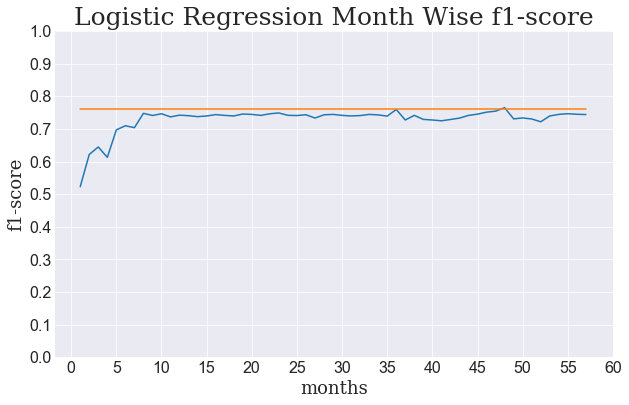

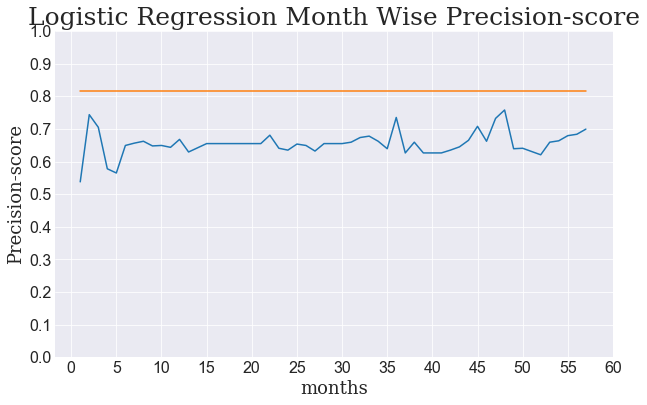

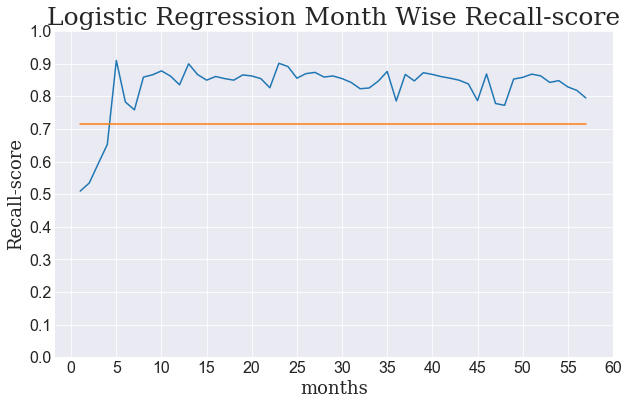

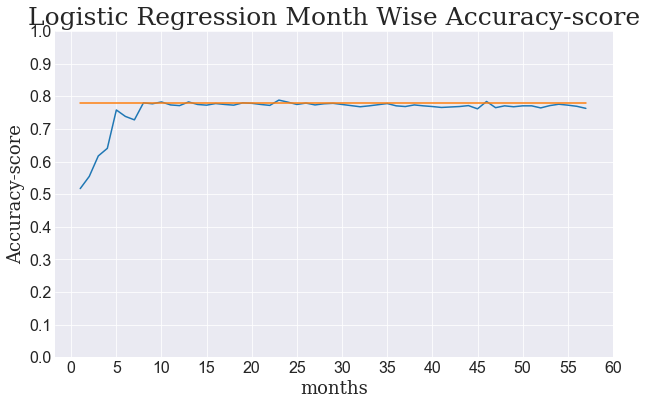

In [68]:

plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][0] for i in range(len(log_lst))])
plt.plot(month_range,[bestlrf1 for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Logistic Regression Month Wise f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()


plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][1] for i in range(len(log_lst))])
plt.plot(month_range,[bestlrpr for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Logistic Regression Month Wise Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][2] for i in range(len(log_lst))])
plt.plot(month_range,[bestlrre for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Logistic Regression Month Wise Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][3] for i in range(len(log_lst))])
plt.plot(month_range,[bestlrac for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Logistic Regression Month Wise Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

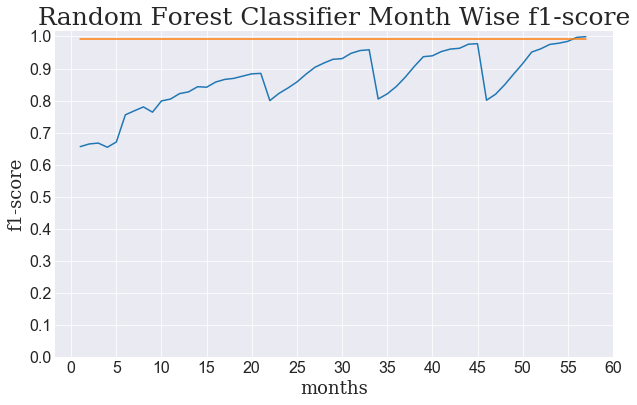

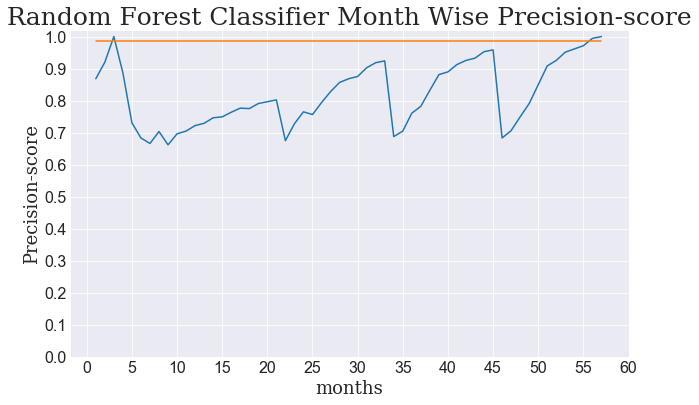

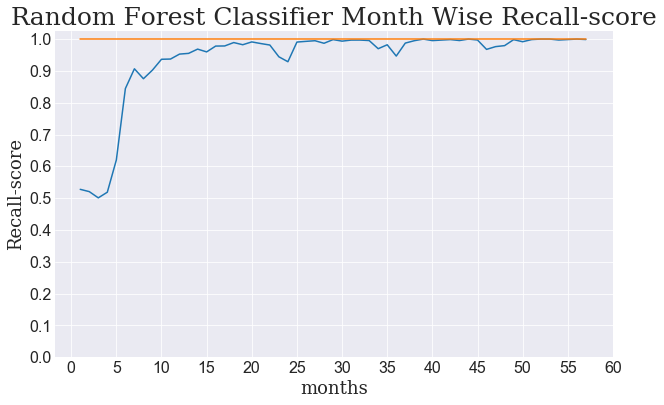

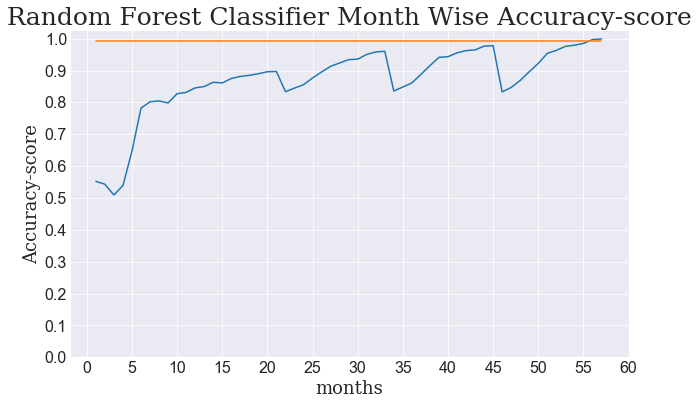

In [69]:
plt.figure(figsize=(10,6))
plt.plot(month_range,[rfc_lst[i][0] for i in range(len(rfc_lst))])
plt.plot(month_range,[bestrfcf1 for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Random Forest Classifier Month Wise f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()


plt.figure(figsize=(10,6))
plt.plot(month_range,[rfc_lst[i][1] for i in range(len(rfc_lst))])
plt.plot(month_range,[bestrfcpr for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Random Forest Classifier Month Wise Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[rfc_lst[i][2] for i in range(len(rfc_lst))])
plt.plot(month_range,[bestrfcre for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Random Forest Classifier Month Wise Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[rfc_lst[i][3] for i in range(len(rfc_lst))])
plt.plot(month_range,[bestrfcac for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Random Forest Classifier Month Wise Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

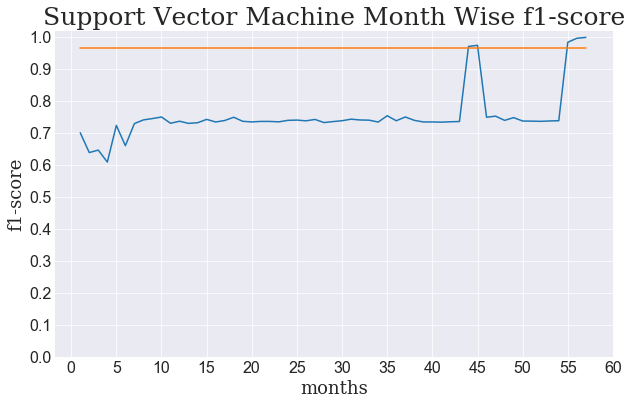

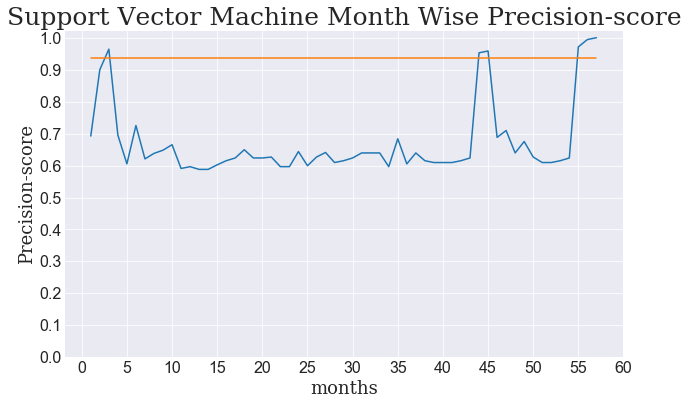

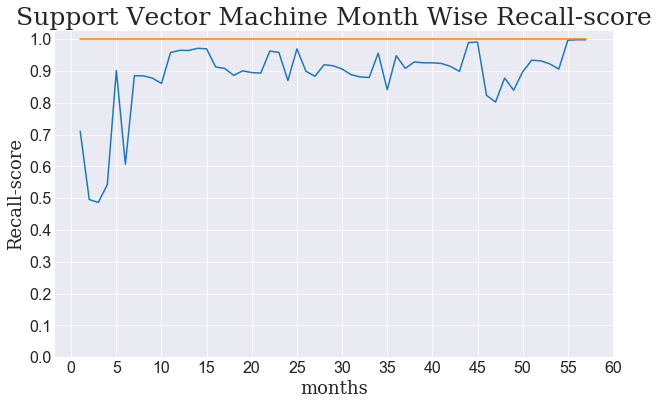

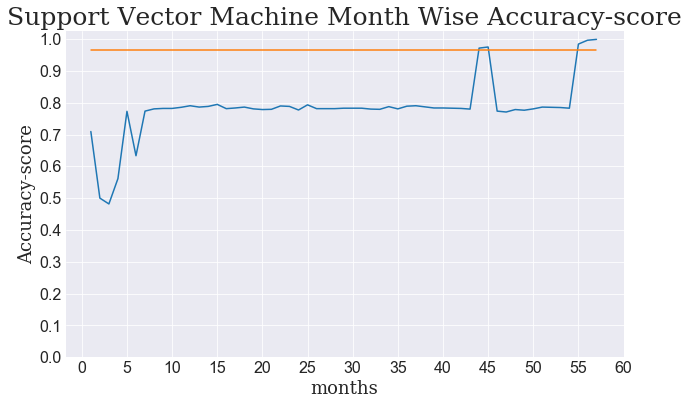

In [70]:
plt.figure(figsize=(10,6))
plt.plot(month_range,[svm_lst[i][0] for i in range(len(svm_lst))])
plt.plot(month_range,[bestsvmf1 for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Support Vector Machine Month Wise f1-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()


plt.figure(figsize=(10,6))
plt.plot(month_range,[svm_lst[i][1] for i in range(len(svm_lst))])
plt.plot(month_range,[bestsvmpr for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Support Vector Machine Month Wise Precision-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[svm_lst[i][2] for i in range(len(svm_lst))])
plt.plot(month_range,[bestsvmre for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Support Vector Machine Month Wise Recall-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(month_range,[svm_lst[i][3] for i in range(len(svm_lst))])
plt.plot(month_range,[bestsvmac for i in range(len(log_lst))])
plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
plt.title('Support Vector Machine Month Wise Accuracy-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.show()

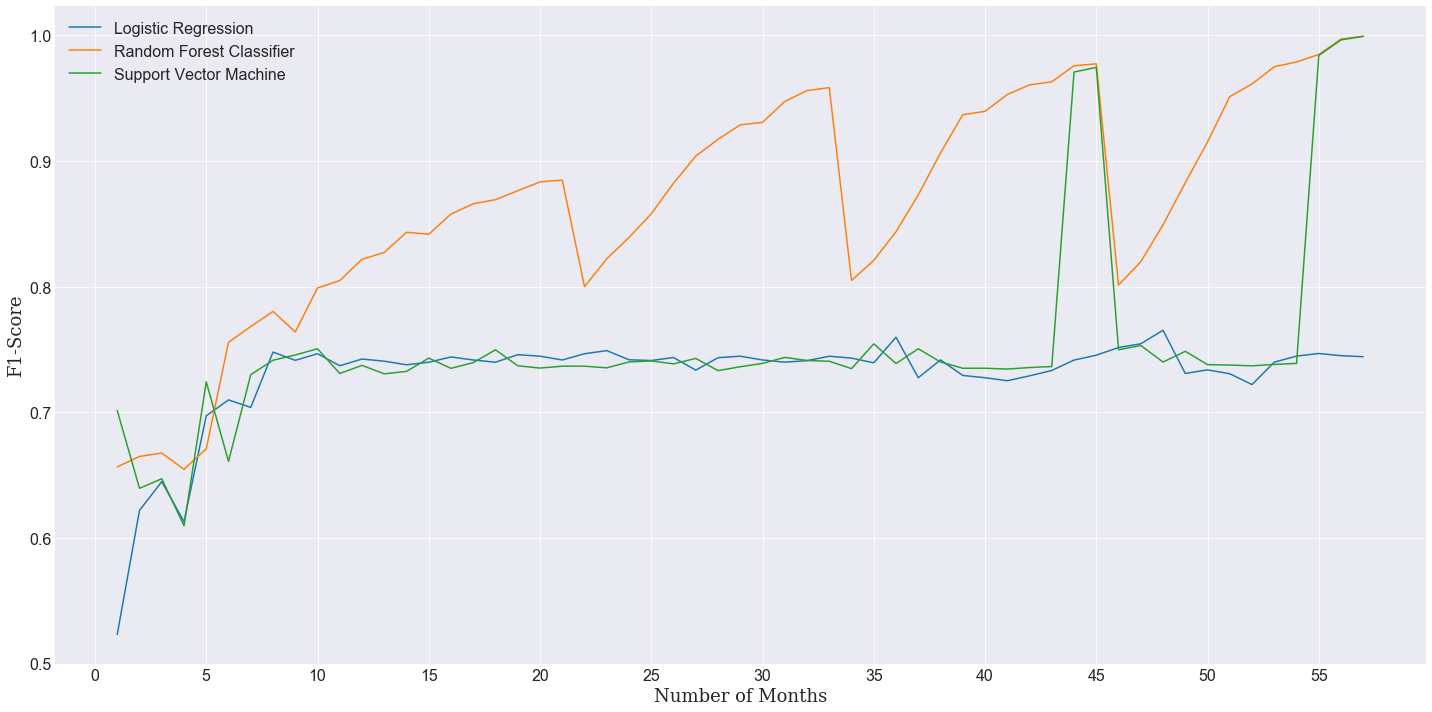

In [142]:
plt.figure(figsize=(20,10))
plt.plot(month_range,[log_lst[i][0] for i in range(len(log_lst))])
plt.plot(month_range,[rfc_lst[i][0] for i in range(len(log_lst))])
plt.plot(month_range,[svm_lst[i][0] for i in range(len(log_lst))])

plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(['Logistic Regression','Random Forest Classifier','Support Vector Machine'])
plt.tight_layout()
plt.xlabel('Number of Months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('F1-Score' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
#plt.title('Month Wise F1-score' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.plot()
plt.tight_layout()
plt.savefig('f1.eps', format='eps',dpi=2000)

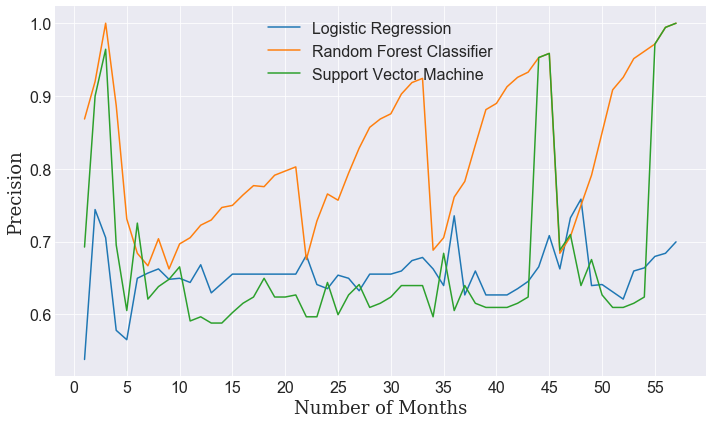

In [143]:
plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][1] for i in range(len(log_lst))])
plt.plot(month_range,[rfc_lst[i][1] for i in range(len(log_lst))])
plt.plot(month_range,[svm_lst[i][1] for i in range(len(log_lst))])

plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(['Logistic Regression','Random Forest Classifier','Support Vector Machine'])
plt.tight_layout()
plt.xlabel('Number of Months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Precision' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
#plt.title('Month Wise Precision' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.plot()
plt.tight_layout()

plt.savefig('Precision.eps', format='eps',dpi=2000)


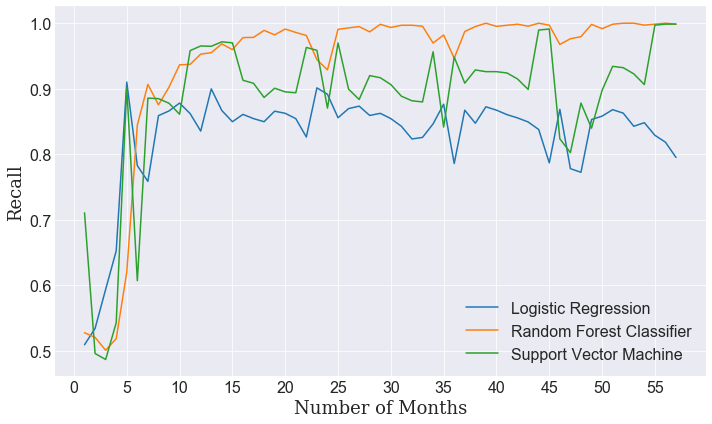

In [144]:
plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][2] for i in range(len(log_lst))])
plt.plot(month_range,[rfc_lst[i][2] for i in range(len(log_lst))])
plt.plot(month_range,[svm_lst[i][2] for i in range(len(log_lst))])

plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(['Logistic Regression','Random Forest Classifier','Support Vector Machine'])
plt.tight_layout()
plt.xlabel('Number of Months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Recall' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
#plt.title('Month Wise Recall' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.plot()
plt.tight_layout()
plt.savefig('Recall.eps', format='eps',dpi=2000)


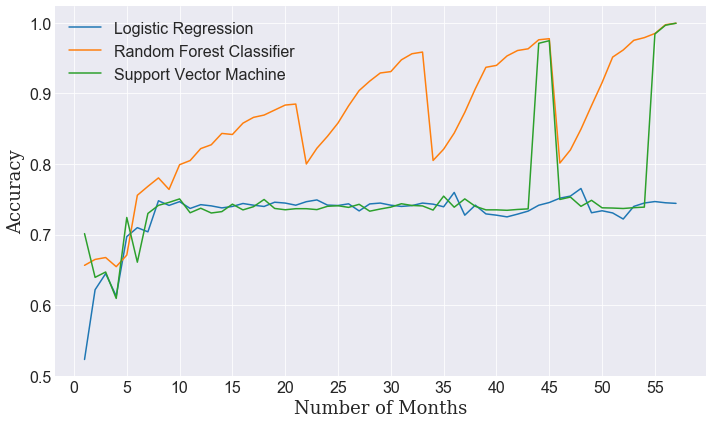

In [145]:
plt.figure(figsize=(10,6))
plt.plot(month_range,[log_lst[i][0] for i in range(len(log_lst))])
plt.plot(month_range,[rfc_lst[i][0] for i in range(len(log_lst))])
plt.plot(month_range,[svm_lst[i][0] for i in range(len(log_lst))])

plt.xticks(np.arange(0, 65, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(['Logistic Regression','Random Forest Classifier','Support Vector Machine'])
plt.tight_layout()
plt.xlabel('Number of Months',fontdict={'family': 'serif','weight': 'normal','size': 18})
plt.ylabel('Accuracy' , fontdict={'family': 'serif','weight': 'normal','size': 18}) #for each component
#plt.title('Month Wise Accuracy' , fontdict={'family': 'serif','weight': 'normal','size': 25})
plt.plot()
plt.tight_layout()
plt.savefig('Accuracy.eps', format='eps',dpi=2000)
